# wczytanie danych

In [3]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
data = pd.read_excel("złączone_dane.xlsx")
data


,label,image_id,0_point_lm_0_x,0_point_lm_0_y,0_point_lm_0_z,0_point_lm_1_x,0_point_lm_1_y,0_point_lm_1_z,0_point_lm_2_x,0_point_lm_2_y,...,5_point_vec_15-16_vz,5_point_vec_2-3_vx,5_point_vec_2-3_vy,5_point_vec_2-3_vz,5_point_vec_11-12_vx,5_point_vec_11-12_vy,5_point_vec_11-12_vz,5_point_vec_7-8_vx,5_point_vec_7-8_vy,5_point_vec_7-8_vz
0,a+,1,0.510674,0.584960,-1.844048e-07,0.544970,0.557959,-0.011171,0.567558,0.510413,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,a+,2,0.510674,0.584960,-1.844048e-07,0.544970,0.557959,-0.011171,0.567558,0.510413,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,a+,3,0.510674,0.584960,-1.844048e-07,0.544970,0.557959,-0.011171,0.567558,0.510413,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,a+,4,0.510674,0.584960,-1.844048e-07,0.544970,0.557959,-0.011171,0.567558,0.510413,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,a+,5,0.510674,0.584960,-1.844048e-07,0.544970,0.557959,-0.011171,0.567558,0.510413,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11417,z,450,0.346380,0.400321,2.243699e-08,0.364384,0.399918,-0.026940,0.372715,0.396515,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11418,z,451,0.346380,0.400321,2.243699e-08,0.364384,0.399918,-0.026940,0.372715,0.396515,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11419,z,452,0.346380,0.400321,2.243699e-08,0.364384,0.399918,-0.026940,0.372715,0.396515,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11420,z,453,0.346380,0.400321,2.243699e-08,0.364384,0.399918,-0.026940,0.372715,0.396515,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
data['label'].value_counts()

label
g     599
f     573
cz    530
h     529
a+    526
k     525
ch    521
rz    486
l+    467
sz    466
o+    454
z     454
j     452
d     450
e+    439
z+    425
s+    422
n+    422
z-    410
c+    388
b     303
a     293
o     288
n     277
l     274
s      66
p      59
c      59
m      43
r      42
t      42
y      41
e      41
u      40
w       8
i       8
Name: count, dtype: int64

In [6]:
data = data.drop("image_id",axis=1)
pd.set_option('display.max_columns', None)
data

,label,0_point_lm_0_x,0_point_lm_0_y,0_point_lm_0_z,0_point_lm_1_x,0_point_lm_1_y,0_point_lm_1_z,0_point_lm_2_x,0_point_lm_2_y,0_point_lm_2_z,0_point_lm_3_x,0_point_lm_3_y,0_point_lm_3_z,0_point_lm_4_x,0_point_lm_4_y,0_point_lm_4_z,0_point_lm_5_x,0_point_lm_5_y,0_point_lm_5_z,0_point_lm_6_x,0_point_lm_6_y,0_point_lm_6_z,0_point_lm_7_x,0_point_lm_7_y,0_point_lm_7_z,0_point_lm_8_x,0_point_lm_8_y,0_point_lm_8_z,0_point_lm_9_x,0_point_lm_9_y,0_point_lm_9_z,0_point_lm_10_x,0_point_lm_10_y,0_point_lm_10_z,0_point_lm_11_x,0_point_lm_11_y,0_point_lm_11_z,0_point_lm_12_x,0_point_lm_12_y,0_point_lm_12_z,0_point_lm_13_x,0_point_lm_13_y,0_point_lm_13_z,0_point_lm_14_x,0_point_lm_14_y,0_point_lm_14_z,0_point_lm_15_x,0_point_lm_15_y,0_point_lm_15_z,0_point_lm_16_x,0_point_lm_16_y,0_point_lm_16_z,0_point_lm_17_x,0_point_lm_17_y,0_point_lm_17_z,0_point_lm_18_x,0_point_lm_18_y,0_point_lm_18_z,0_point_lm_19_x,0_point_lm_19_y,0_point_lm_19_z,0_point_lm_20_x,0_point_lm_20_y,0_point_lm_20_z,0_point_vec_3-4_vx,0_point_vec_3-4_vy,0_point_vec_3-4_vz,0_point_vec_0-5_vx,0_point_vec_0-5_vy,0_point_vec_0-5_vz,0_point_vec_17-18_vx,0_point_vec_17-18_vy,0_point_vec_17-18_vz,0_point_vec_0-17_vx,0_point_vec_0-17_vy,0_point_vec_0-17_vz,0_point_vec_13-14_vx,0_point_vec_13-14_vy,0_point_vec_13-14_vz,0_point_vec_13-17_vx,0_point_vec_13-17_vy,0_point_vec_13-17_vz,0_point_vec_18-19_vx,0_point_vec_18-19_vy,0_point_vec_18-19_vz,0_point_vec_5-6_vx,0_point_vec_5-6_vy,0_point_vec_5-6_vz,0_point_vec_5-9_vx,0_point_vec_5-9_vy,0_point_vec_5-9_vz,0_point_vec_14-15_vx,0_point_vec_14-15_vy,0_point_vec_14-15_vz,0_point_vec_0-1_vx,0_point_vec_0-1_vy,0_point_vec_0-1_vz,0_point_vec_9-10_vx,0_point_vec_9-10_vy,0_point_vec_9-10_vz,0_point_vec_1-2_vx,0_point_vec_1-2_vy,0_point_vec_1-2_vz,0_point_vec_9-13_vx,0_point_vec_9-13_vy,0_point_vec_9-13_vz,0_point_vec_10-11_vx,0_point_vec_10-11_vy,0_point_vec_10-11_vz,0_point_vec_19-20_vx,0_point_vec_19-20_vy,0_point_vec_19-20_vz,0_point_vec_6-7_vx,0_point_vec_6-7_vy,0_point_vec_6-7_vz,0_point_vec_15-16_vx,0_point_vec_15-16_vy,0_point_vec_15-16_vz,0_point_vec_2-3_vx,0_point_vec_2-3_vy,0_point_vec_2-3_vz,0_point_vec_11-12_vx,0_point_vec_11-12_vy,0_point_vec_11-12_vz,0_point_vec_7-8_vx,0_point_vec_7-8_vy,0_point_vec_7-8_vz,1_point_lm_0_x,1_point_lm_0_y,1_point_lm_0_z,1_point_lm_1_x,1_point_lm_1_y,1_point_lm_1_z,1_point_lm_2_x,1_point_lm_2_y,1_point_lm_2_z,1_point_lm_3_x,1_point_lm_3_y,1_point_lm_3_z,1_point_lm_4_x,1_point_lm_4_y,1_point_lm_4_z,1_point_lm_5_x,1_point_lm_5_y,1_point_lm_5_z,1_point_lm_6_x,1_point_lm_6_y,1_point_lm_6_z,1_point_lm_7_x,1_point_lm_7_y,1_point_lm_7_z,1_point_lm_8_x,1_point_lm_8_y,1_point_lm_8_z,1_point_lm_9_x,1_point_lm_9_y,1_point_lm_9_z,1_point_lm_10_x,1_point_lm_10_y,1_point_lm_10_z,1_point_lm_11_x,1_point_lm_11_y,1_point_lm_11_z,1_point_lm_12_x,1_point_lm_12_y,1_point_lm_12_z,1_point_lm_13_x,1_point_lm_13_y,1_point_lm_13_z,1_point_lm_14_x,1_point_lm_14_y,1_point_lm_14_z,1_point_lm_15_x,1_point_lm_15_y,1_point_lm_15_z,1_point_lm_16_x,1_point_lm_16_y,1_point_lm_16_z,1_point_lm_17_x,1_point_lm_17_y,1_point_lm_17_z,1_point_lm_18_x,1_point_lm_18_y,1_point_lm_18_z,1_point_lm_19_x,1_point_lm_19_y,1_point_lm_19_z,1_point_lm_20_x,1_point_lm_20_y,1_point_lm_20_z,1_point_vec_3-4_vx,1_point_vec_3-4_vy,1_point_vec_3-4_vz,1_point_vec_0-5_vx,1_point_vec_0-5_vy,1_point_vec_0-5_vz,1_point_vec_17-18_vx,1_point_vec_17-18_vy,1_point_vec_17-18_vz,1_point_vec_0-17_vx,1_point_vec_0-17_vy,1_point_vec_0-17_vz,1_point_vec_13-14_vx,1_point_vec_13-14_vy,1_point_vec_13-14_vz,1_point_vec_13-17_vx,1_point_vec_13-17_vy,1_point_vec_13-17_vz,1_point_vec_18-19_vx,1_point_vec_18-19_vy,1_point_vec_18-19_vz,1_point_vec_5-6_vx,1_point_vec_5-6_vy,1_point_vec_5-6_vz,1_point_vec_5-9_vx,1_point_vec_5-9_vy,1_point_vec_5-9_vz,1_point_vec_14-15_vx,1_point_vec_14-15_vy,1_point_vec_14-15_vz,1_point_vec_0-1_vx,1_point_vec_0-1_vy,1_point_vec_0-1_vz,1_point_vec_9-10_vx,1_point_vec_9-10_vy,1_point_vec_9-10_vz,1_point_vec_1-2_vx,1_point_vec_1-2_vy,1_point_vec_1-2_vz,

In [7]:
for column in data.columns:
    if '3_p' in column or '4_p' in column or '5_p' in column:
        data = data.drop(column,axis=1)
data

,label,0_point_lm_0_x,0_point_lm_0_y,0_point_lm_0_z,0_point_lm_1_x,0_point_lm_1_y,0_point_lm_1_z,0_point_lm_2_x,0_point_lm_2_y,0_point_lm_2_z,0_point_lm_3_x,0_point_lm_3_y,0_point_lm_3_z,0_point_lm_4_x,0_point_lm_4_y,0_point_lm_4_z,0_point_lm_5_x,0_point_lm_5_y,0_point_lm_5_z,0_point_lm_6_x,0_point_lm_6_y,0_point_lm_6_z,0_point_lm_7_x,0_point_lm_7_y,0_point_lm_7_z,0_point_lm_8_x,0_point_lm_8_y,0_point_lm_8_z,0_point_lm_9_x,0_point_lm_9_y,0_point_lm_9_z,0_point_lm_10_x,0_point_lm_10_y,0_point_lm_10_z,0_point_lm_11_x,0_point_lm_11_y,0_point_lm_11_z,0_point_lm_12_x,0_point_lm_12_y,0_point_lm_12_z,0_point_lm_13_x,0_point_lm_13_y,0_point_lm_13_z,0_point_lm_14_x,0_point_lm_14_y,0_point_lm_14_z,0_point_lm_15_x,0_point_lm_15_y,0_point_lm_15_z,0_point_lm_16_x,0_point_lm_16_y,0_point_lm_16_z,0_point_lm_17_x,0_point_lm_17_y,0_point_lm_17_z,0_point_lm_18_x,0_point_lm_18_y,0_point_lm_18_z,0_point_lm_19_x,0_point_lm_19_y,0_point_lm_19_z,0_point_lm_20_x,0_point_lm_20_y,0_point_lm_20_z,0_point_vec_3-4_vx,0_point_vec_3-4_vy,0_point_vec_3-4_vz,0_point_vec_0-5_vx,0_point_vec_0-5_vy,0_point_vec_0-5_vz,0_point_vec_17-18_vx,0_point_vec_17-18_vy,0_point_vec_17-18_vz,0_point_vec_0-17_vx,0_point_vec_0-17_vy,0_point_vec_0-17_vz,0_point_vec_13-14_vx,0_point_vec_13-14_vy,0_point_vec_13-14_vz,0_point_vec_13-17_vx,0_point_vec_13-17_vy,0_point_vec_13-17_vz,0_point_vec_18-19_vx,0_point_vec_18-19_vy,0_point_vec_18-19_vz,0_point_vec_5-6_vx,0_point_vec_5-6_vy,0_point_vec_5-6_vz,0_point_vec_5-9_vx,0_point_vec_5-9_vy,0_point_vec_5-9_vz,0_point_vec_14-15_vx,0_point_vec_14-15_vy,0_point_vec_14-15_vz,0_point_vec_0-1_vx,0_point_vec_0-1_vy,0_point_vec_0-1_vz,0_point_vec_9-10_vx,0_point_vec_9-10_vy,0_point_vec_9-10_vz,0_point_vec_1-2_vx,0_point_vec_1-2_vy,0_point_vec_1-2_vz,0_point_vec_9-13_vx,0_point_vec_9-13_vy,0_point_vec_9-13_vz,0_point_vec_10-11_vx,0_point_vec_10-11_vy,0_point_vec_10-11_vz,0_point_vec_19-20_vx,0_point_vec_19-20_vy,0_point_vec_19-20_vz,0_point_vec_6-7_vx,0_point_vec_6-7_vy,0_point_vec_6-7_vz,0_point_vec_15-16_vx,0_point_vec_15-16_vy,0_point_vec_15-16_vz,0_point_vec_2-3_vx,0_point_vec_2-3_vy,0_point_vec_2-3_vz,0_point_vec_11-12_vx,0_point_vec_11-12_vy,0_point_vec_11-12_vz,0_point_vec_7-8_vx,0_point_vec_7-8_vy,0_point_vec_7-8_vz,1_point_lm_0_x,1_point_lm_0_y,1_point_lm_0_z,1_point_lm_1_x,1_point_lm_1_y,1_point_lm_1_z,1_point_lm_2_x,1_point_lm_2_y,1_point_lm_2_z,1_point_lm_3_x,1_point_lm_3_y,1_point_lm_3_z,1_point_lm_4_x,1_point_lm_4_y,1_point_lm_4_z,1_point_lm_5_x,1_point_lm_5_y,1_point_lm_5_z,1_point_lm_6_x,1_point_lm_6_y,1_point_lm_6_z,1_point_lm_7_x,1_point_lm_7_y,1_point_lm_7_z,1_point_lm_8_x,1_point_lm_8_y,1_point_lm_8_z,1_point_lm_9_x,1_point_lm_9_y,1_point_lm_9_z,1_point_lm_10_x,1_point_lm_10_y,1_point_lm_10_z,1_point_lm_11_x,1_point_lm_11_y,1_point_lm_11_z,1_point_lm_12_x,1_point_lm_12_y,1_point_lm_12_z,1_point_lm_13_x,1_point_lm_13_y,1_point_lm_13_z,1_point_lm_14_x,1_point_lm_14_y,1_point_lm_14_z,1_point_lm_15_x,1_point_lm_15_y,1_point_lm_15_z,1_point_lm_16_x,1_point_lm_16_y,1_point_lm_16_z,1_point_lm_17_x,1_point_lm_17_y,1_point_lm_17_z,1_point_lm_18_x,1_point_lm_18_y,1_point_lm_18_z,1_point_lm_19_x,1_point_lm_19_y,1_point_lm_19_z,1_point_lm_20_x,1_point_lm_20_y,1_point_lm_20_z,1_point_vec_3-4_vx,1_point_vec_3-4_vy,1_point_vec_3-4_vz,1_point_vec_0-5_vx,1_point_vec_0-5_vy,1_point_vec_0-5_vz,1_point_vec_17-18_vx,1_point_vec_17-18_vy,1_point_vec_17-18_vz,1_point_vec_0-17_vx,1_point_vec_0-17_vy,1_point_vec_0-17_vz,1_point_vec_13-14_vx,1_point_vec_13-14_vy,1_point_vec_13-14_vz,1_point_vec_13-17_vx,1_point_vec_13-17_vy,1_point_vec_13-17_vz,1_point_vec_18-19_vx,1_point_vec_18-19_vy,1_point_vec_18-19_vz,1_point_vec_5-6_vx,1_point_vec_5-6_vy,1_point_vec_5-6_vz,1_point_vec_5-9_vx,1_point_vec_5-9_vy,1_point_vec_5-9_vz,1_point_vec_14-15_vx,1_point_vec_14-15_vy,1_point_vec_14-15_vz,1_point_vec_0-1_vx,1_point_vec_0-1_vy,1_point_vec_0-1_vz,1_point_vec_9-10_vx,1_point_vec_9-10_vy,1_point_vec_9-10_vz,1_point_vec_1-2_vx,1_point_vec_1-2_vy,1_point_vec_1-2_vz,

# Las losowy

Dokładność: 0.9903719912472647

Raport klasyfikacji:
               precision    recall  f1-score   support

           a       1.00      0.97      0.98        61
          a+       1.00      1.00      1.00       111
           b       0.98      0.98      0.98        56
           c       0.75      0.67      0.71         9
          c+       1.00      1.00      1.00        87
          ch       1.00      1.00      1.00       107
          cz       1.00      1.00      1.00       113
           d       1.00      1.00      1.00        87
           e       1.00      1.00      1.00        12
          e+       1.00      1.00      1.00        93
           f       0.99      1.00      1.00       126
           g       1.00      1.00      1.00       115
           h       1.00      1.00      1.00       101
           i       1.00      1.00      1.00         1
           j       1.00      1.00      1.00        87
           k       1.00      1.00      1.00        98
           l       0.98    

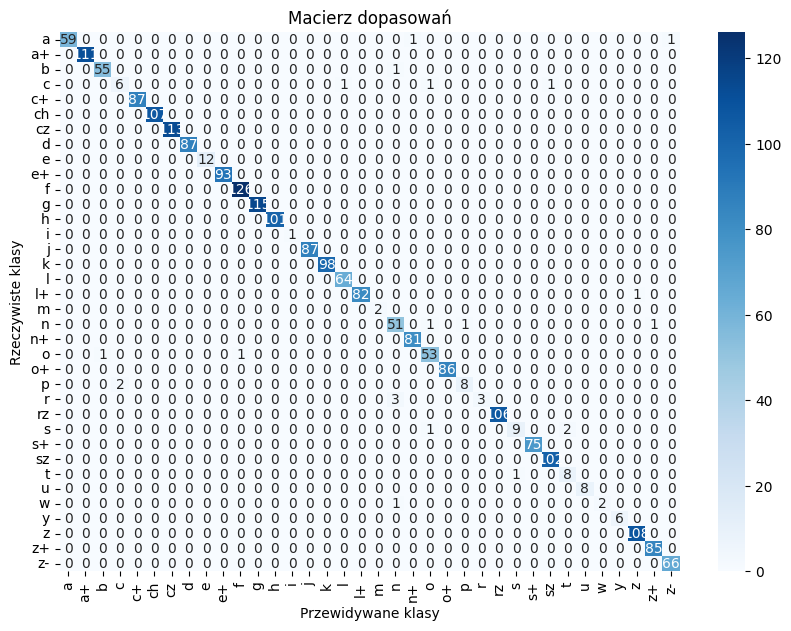

In [8]:
y = data.iloc[:, 0]
X = data.iloc[:, 1:]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print("Dokładność:", accuracy_score(y_test, y_pred))

print("\nRaport klasyfikacji:\n", classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)

# Wizualizacja macierzy dopasowań
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=model.classes_, yticklabels=model.classes_)
plt.title("Macierz dopasowań")
plt.xlabel("Przewidywane klasy")
plt.ylabel("Rzeczywiste klasy")
plt.show()
